In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
!pip install preprocessor
import preprocessor as p
import re
!pip install text_preprocessing
from text_preprocessing import preprocess_text
from text_preprocessing import remove_number, remove_special_character, remove_punctuation, remove_stopword, lemmatize_word

def prapemrosesan(string):
  string = p.clean(string.lower())
  preprocess_functions = [remove_number, remove_special_character, remove_punctuation, remove_stopword, lemmatize_word]
  preprocessed_text = preprocess_text(string, preprocess_functions)
  return preprocessed_text

In [ ]:
x = []

for tweet in df['text']:
  # print(len(x))
  x.append(prapemrosesan(tweet))

print(x[0])
print(x)

said
['said', 'plus youve added commercial experience tacky', 'didnt today must mean need take another trip', 'really aggressive blast obnoxious entertainment guest face amp little recourse', 'really big bad thing', 'seriously would pay flight seat didnt playingits really bad thing flying va', 'yes nearly every time fly vx ear worm wont go away', 'really missed prime opportunity men without hat parody', 'well didntbut', 'amazing arrived hour early youre good', 'know suicide second leading cause death among teen', 'lt pretty graphic much better minimal iconography', 'great deal already thinking nd trip amp havent even gone st trip yet', 'im flying sky u take away travel', 'thanks', 'sfopdx schedule still mia', 'excited first cross country flight lax mco ive heard nothing great thing virgin america', 'flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help', 'flying', 'know would amazingly awesome bosfll please want fly', 'first fare may three time carrier 

In [ ]:
from gensim.models import Word2Vec

vec = Word2Vec(x, size=300)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing import sequence

tk = Tokenizer()
tk.fit_on_texts(x)
x = tk.texts_to_sequences(x)
x = sequence.pad_sequences(x, padding='post')

words_total = tk.word_index

print(len(x[0]))
print(len(words_total))

21
10188


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras import utils as np_utils

y = df['airline_sentiment']

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

y = np_utils.to_categorical(y, num_classes= 3)
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

print('Banyak Data Latih    : ', len(x_train))
print('Banyak Data Validasi : ', len(x_val))

Banyak Data Latih    :  11712
Banyak Data Validasi :  2928


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(words_total)+1, 300),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.AveragePooling1D(pool_size=3),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Adam = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])

# es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20)
mc = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[mc])

Epoch 1/50
366/366 [==============================] - 10s 15ms/step - loss: 0.1308 - accuracy: 0.7120 - val_loss: 0.1080 - val_accuracy: 0.7620
Epoch 2/50
366/366 [==============================] - 5s 14ms/step - loss: 0.0961 - accuracy: 0.8003 - val_loss: 0.1062 - val_accuracy: 0.7749
Epoch 3/50
366/366 [==============================] - 5s 14ms/step - loss: 0.0790 - accuracy: 0.8419 - val_loss: 0.1040 - val_accuracy: 0.7859
Epoch 4/50
366/366 [==============================] - 5s 15ms/step - loss: 0.0668 - accuracy: 0.8666 - val_loss: 0.1059 - val_accuracy: 0.7896
Epoch 5/50
366/366 [==============================] - 5s 14ms/step - loss: 0.0557 - accuracy: 0.8939 - val_loss: 0.1091 - val_accuracy: 0.7845
Epoch 6/50
366/366 [==============================] - 5s 15ms/step - loss: 0.0482 - accuracy: 0.9069 - val_loss: 0.1105 - val_accuracy: 0.7770
Epoch 7/50
366/366 [==============================] - 5s 14ms/step - loss: 0.0416 - accuracy: 0.9198 - val_loss: 0.1242 - val_accuracy: 0.748

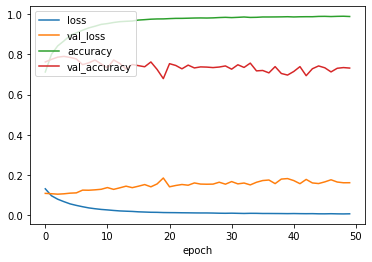

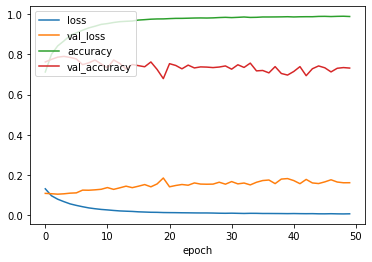

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/best_model.h5')

_, train_acc = model.evaluate(x_train, y_train)
_, val_acc = model.evaluate(x_val, y_val)

print('Train: %.4f, Val: %.4f' % (train_acc, val_acc))

92/92 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.7896
Train: 0.9074, Val: 0.7896
92/92 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.7896
Train: 0.9074, Val: 0.7896


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         3056700   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 256)         230656    
_________________________________________________________________
average_pooling1d (AveragePo (None, None, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2